In [291]:
import pandas as pd
import numpy as np
from random import choice
import plotly.graph_objects as go

In [ ]:
boston = pd.read_csv('boston.csv',header=None)

In [ ]:
arr = boston.to_numpy()

# Normalização do Escore-Z

In [ ]:
def mu(vector):
    mu = sum(vector)/len(vector)
    return mu

In [ ]:
def sigma(vector):
    diffs = (arr[:,6] - mu(vector))
    diffs_2 = diffs**2
    N = len(diffs)
    summation = sum(diffs_2)
    sigma = np.sqrt(summation/(N-1))
    return sigma

In [ ]:
def norm_z(vector):
    norm_vector = (vector - mu(vector))/sigma(vector)
    return norm_vector

In [ ]:
norm_z(arr[:,6])[1:10] 

# Encontrar Raizes da Função (Newton-Raphson)

In [ ]:
def f(x):
    return x**2 - 2
def fp(x):
    return x*2

def newton_raphson(x0,tol):
    xt1 = x0
    while abs(f(xt1)) > tol:
        xt2 = xt1 - f(xt1)/fp(xt1)
        xt1 = xt2
    return xt1

In [ ]:
newton_raphson(1,1e-5)

# Regressão Linear - Gradiente Descendente

In [272]:
import plotly.express as px

In [273]:
df_1d = pd.read_csv('artificial1d.csv',header=None)

In [274]:
x = df_1d[0].to_numpy()

In [275]:
y = df_1d[1].to_numpy()

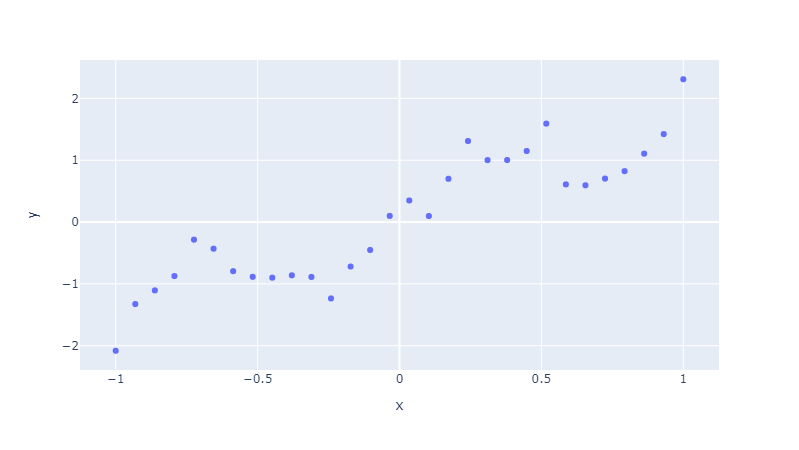

In [276]:
px.scatter(x = x,y = y)

In [277]:
class AlgoritmoGD:
    def __init__(self):
        self.w0 = 0
        self.w1 = 0
        self.alfa = 1e-2
        self.x_i = []
        self.y_i = []
        self.valores_mse = []
        self.valores_w0 = []
        self.valores_w1 = []

        # print("instancia criada")

    def fit(self, x, y):
        if isinstance(x, np.ndarray) and isinstance(y, np.ndarray):
            self.x_i = x
            self.y_i = y
        elif isinstance(x, list) and isinstance(y, list):
            self.x_i = np.array(x)
            self.y_i = np.array(y)
        else:
            raise TypeError("Insira listas ou arrays")
        # print('fittado')

    def train(self, alfa = 1e-2, num_it=1000):
        w0_t0 = self.w0
        w1_t0 = self.w1
        tol = 1
        N = self.y_i.size
        for i in range(num_it):

            ei = self.y_i - self.x_i * w1_t0 - w0_t0
            MSE = (1 / 2 * N) * (ei ** 2)
            self.valores_mse.append(sum(MSE))
            # print("ei",sum(ei))

            J_w0 = -(1 / N) * sum(ei)
            # print("J_w0",J_w0)

            J_w1 = -(1 / N) * sum(ei * self.x_i)
            # print("J_w1",J_w1)

            w0_t1 = w0_t0 - alfa * J_w0
            w1_t1 = w1_t0 - alfa * J_w1

            w0_t0 = w0_t1
            w1_t0 = w1_t1
            
            self.valores_w0.append(w0_t0)
            self.valores_w1.append(w1_t0)

            # print('---FIM EPOCH----\n\n\n')

        # print(sum(ei),J_w0,J_w1,w0_t1,w1_t1)
        self.w0 = w0_t0
        self.w1 = w1_t0

    def plot_line(self, title="Regressão"):
        fig = go.Figure(
            data=go.Scatter(
                x=self.x_i, y=self.x_i * self.w1 + self.w0, name="Algoritmo GD"
            ),
            layout=go.Layout(title=title),
        )
        fig.add_trace(
            go.Scatter(x=self.x_i, y=self.y_i, name="Dados 1D", mode="markers")
        )

        return fig

    def plot_mse(self, title="MSE x Iterações"):
        fig = go.Figure(
            data=go.Scatter(x=list(range(len(self.valores_mse))), y=self.valores_mse, name = 'MSE'),
            layout=go.Layout(title=title),
        )
        return fig

    def animate_line(self):
        return

    def animate_mse(self):
        return

In [278]:
gd = AlgoritmoGD()

In [279]:
gd.fit(x = x, y = y)
gd.train()

## Estudo de Alfa

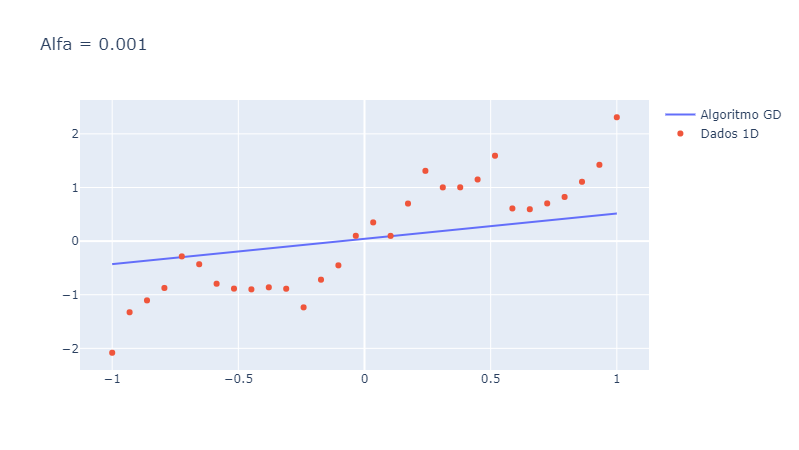

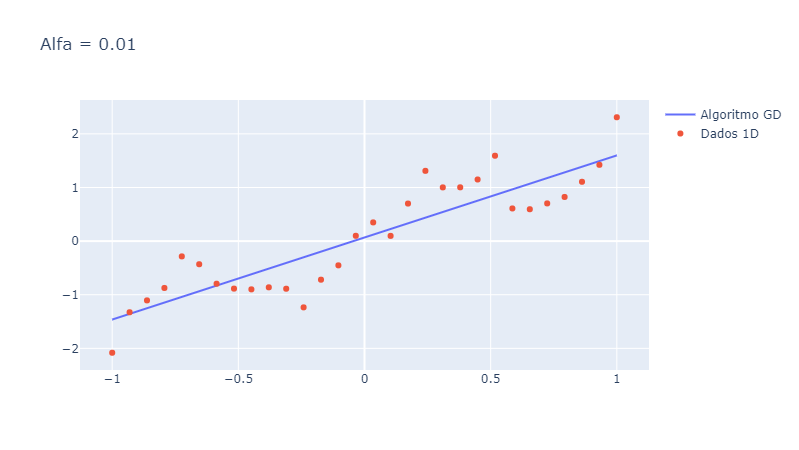

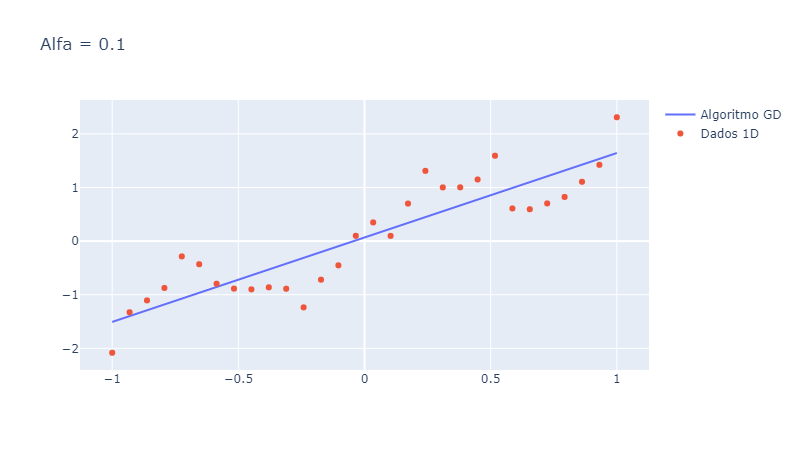

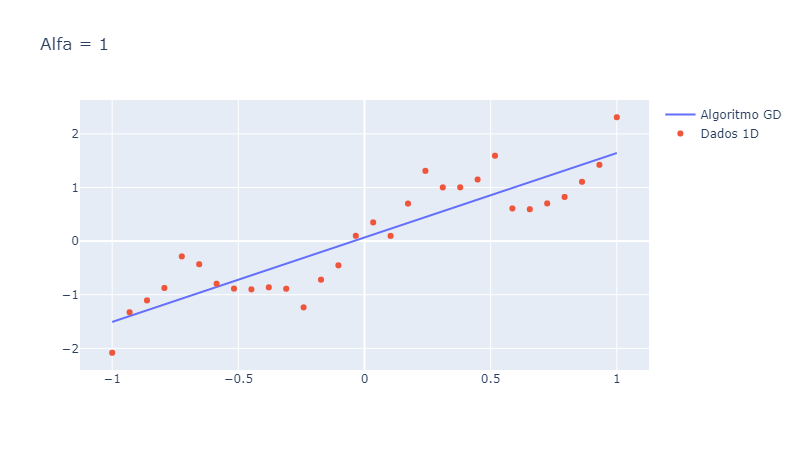

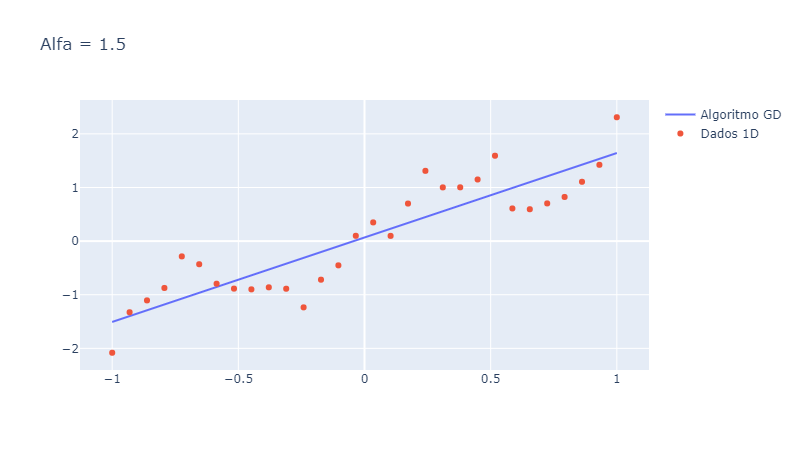

In [280]:
for alfa in [1e-3,1e-2,1e-1,1,1.5]:
    gd = AlgoritmoGD()
    gd.fit(x = x, y = y)
    gd.train(alfa)
    gd.plot_line(title = f'Alfa = {alfa}').show()

## Estudo Iterações

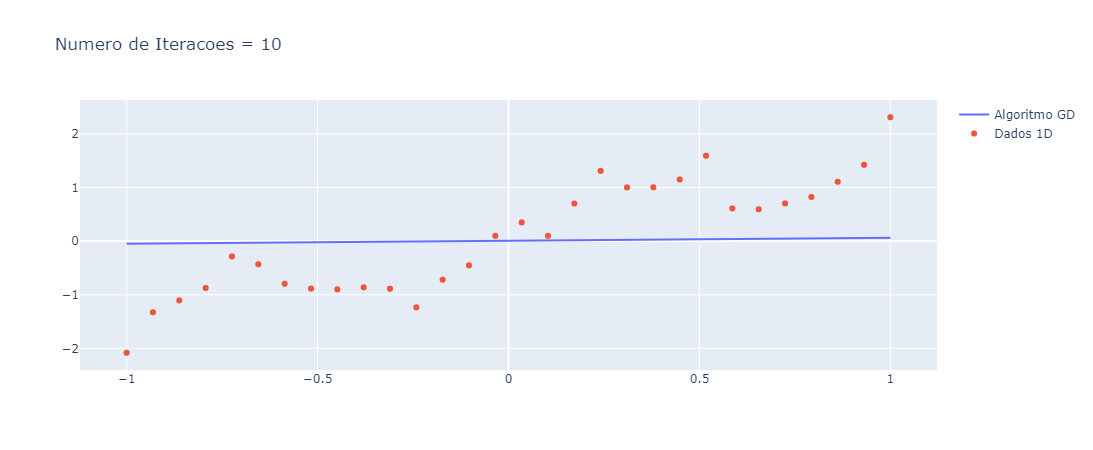

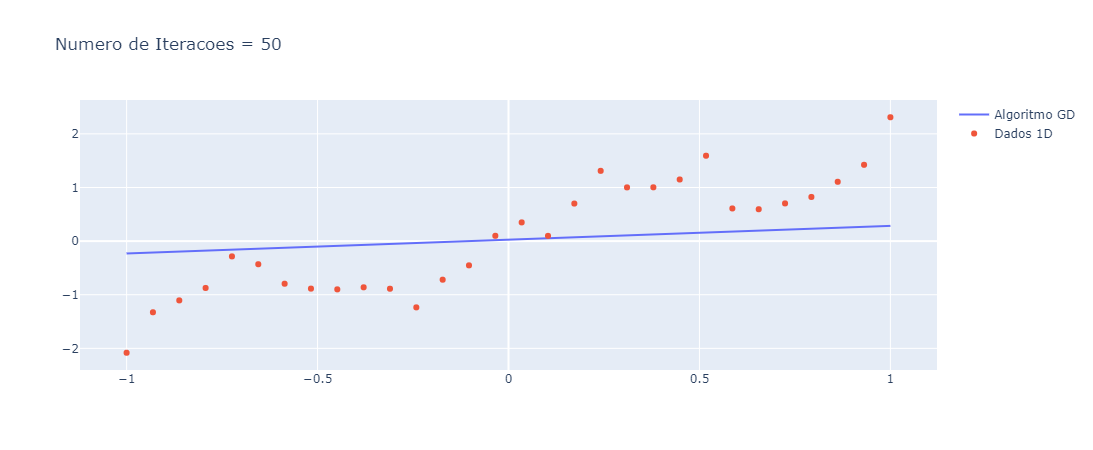

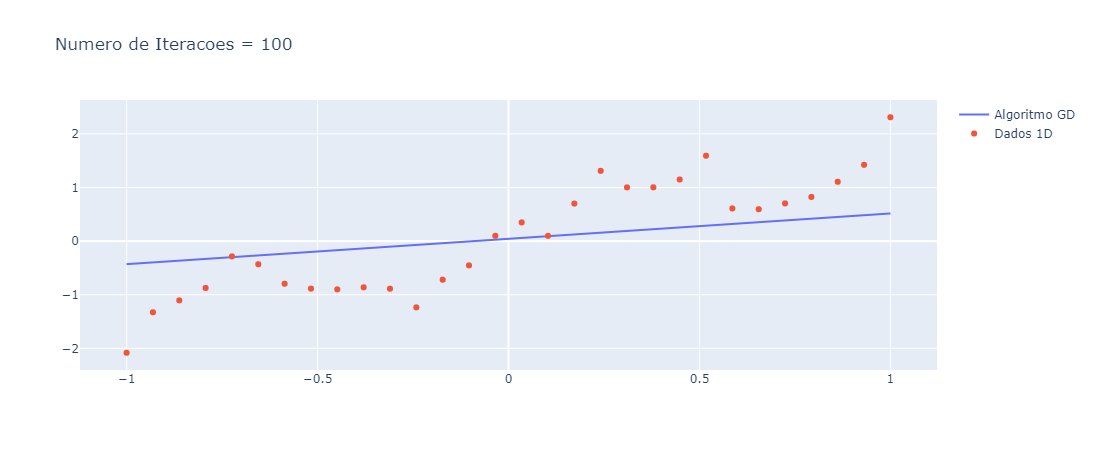

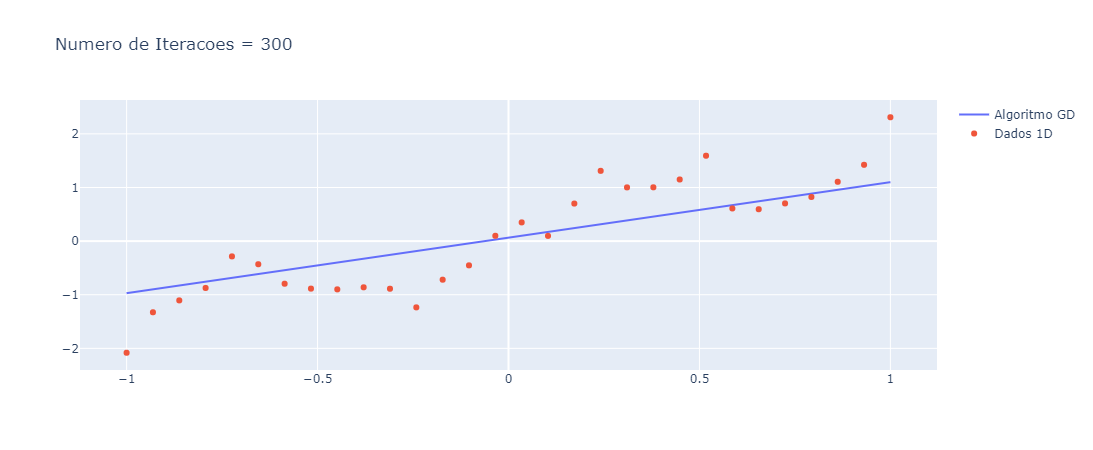

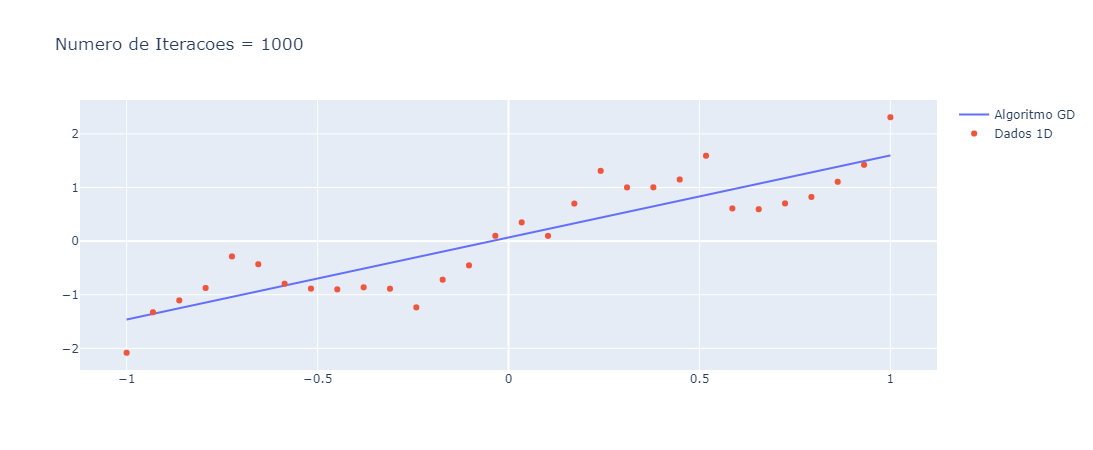

In [180]:
for iteracoes in [10,50,100,300,1000]:
    gd = AlgoritmoGD()
    gd.fit(x = x, y = y)
    gd.train(num_it = iteracoes)
    gd.plot_line(title = f'Numero de Iteracoes = {iteracoes}').show()

## MSE X ITERAÇÃO

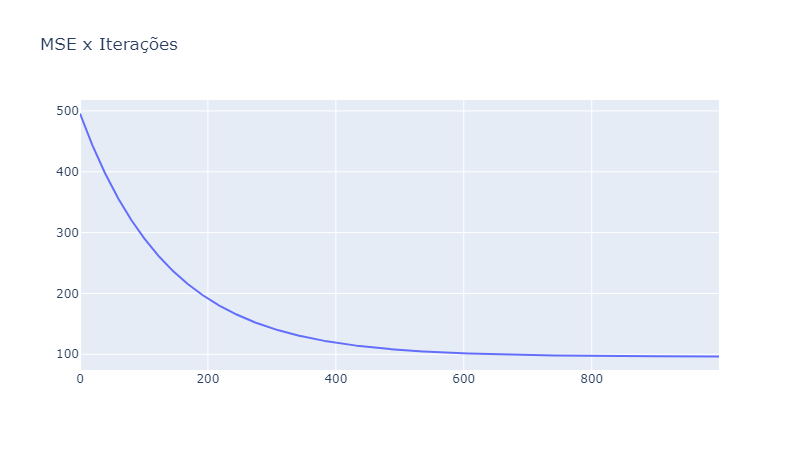

In [281]:
gd = AlgoritmoGD()
gd.fit(x = x, y = y)
gd.train()
gd.plot_mse()

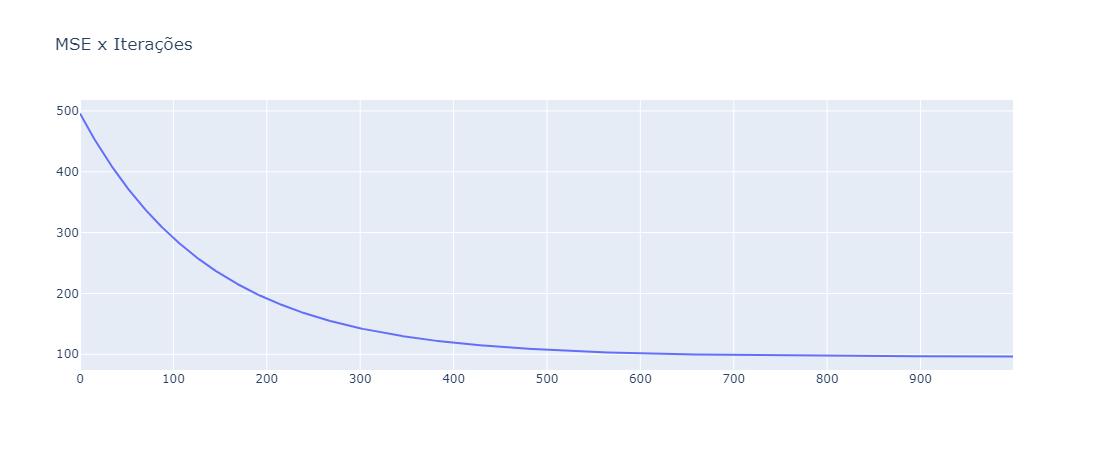

## Plot Dinâmico

In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=1, cols=2, subplot_titles=('MSE', 'Dados do Problema'),
    horizontal_spacing=0.051
)

fig.add_trace(go.Scatter(x = x,y = y,mode = 'markers', name = 'Dados 1D') ,row=1, col=2) 
fig.add_trace(go.Scatter(x = x,y = [0]*len(x), name = 'Reta do Algoritmo'),row=1, col=2) 

fig_data_mse = gd.plot_mse().data[0]
#fig_data_mse.mode = 'markers'
#fig_data_mse.marker = dict(color="black", size=5)

fig.add_trace(fig_data_mse, row=1, col=1)

fig.add_trace(go.Scatter(x = [0], y = [gd.valores_mse[0]], name = 'Iterações',mode = 'markers',opacity = 0.6,  marker = dict(color = 'red')), row=1, col=1)  

frames =[go.Frame(data=[go.Scatter(visible=True),
                        
                        go.Scatter(x = x, y = gd.valores_w0[k] + gd.valores_w1[k]*x),
                        
                        go.Scatter(visible=True),
                        
                        go.Scatter(x = [k] ,y = [gd.valores_mse[k]], mode = 'markers',marker=dict(color="red", size=10))],
                  traces=[0,1,2,3]) for k in range(0,len(gd.valores_mse),10)]

fig.frames=frames
button = dict(
             label='Play',
             method='animate',
             args=[None, dict(frame=dict(duration=100, redraw=False),
                              fromcurrent=True,
                              mode='animate')])
fig.update_layout(updatemenus=[dict(type='buttons',
                              showactive=False,
                              y=0,
                              x=1.05,
                              xanchor='left',
                              yanchor='bottom',
                              buttons=[button] )
                                      ],
                 width=1000, height=500)
                              
fig 

# Regressão Linear - OLS

In [ ]:
class AlgoritmoOLS:
    def __init__(self):
        self.w0 = 0.1
        self.w1 = 0.1
        self.alfa = 0.1
        self.x_i = []
        self.y_i = []
        self.valores_mse = []
        self.valores_w0 = []
        self.valores_w1 = []

        # print("instancia criada")

    def fit(self, x, y):
        if isinstance(x, np.ndarray) and isinstance(y, np.ndarray):
            self.X = x
            self.y_i = y
        elif isinstance(x, list) and isinstance(y, list):
            self.x_i = np.array(x)
            self.y_i = np.array(y)
        else:
            raise TypeError("Insira listas ou arrays")
        # print('fittado')
    
    def train(self):
        W = np.inv(X.T*X)*X.T*y
        return W

In [ ]:
X = np.append([np.ones(30)],[x] ,axis = 0).T

In [ ]:
W = np.linalg.inv(X.T @ X) @ X.T @ y

In [ ]:
fig = go.Figure(go.Scatter(x = x, y = W[0] + W[1]*x))
fig.add_trace(go.Scatter(x = x,y = y, mode = 'markers' ))

# Regressão Linear - Gradiente Descendente Estocástico

In [266]:
class AlgoritmoSGD:
    def __init__(self):
        self.w0 = 0
        self.w1 = 0
        self.alfa = 0.1
        self.x_i = []
        self.y_i = []
        self.valores_mse = []
        self.valores_w0 = []
        self.valores_w1 = []
        self.ei_iteracao = []

        # print("instancia criada")

    def fit(self, x, y):
        if isinstance(x, np.ndarray) and isinstance(y, np.ndarray):
            self.x_i = x
            self.y_i = y
        elif isinstance(x, list) and isinstance(y, list):
            self.x_i = np.array(x)
            self.y_i = np.array(y)
        else:
            raise TypeError("Insira listas ou arrays")
        # print('fittado')

    def train(self, alfa=1e-2, num_it=30):

        w0_t0 = self.w0
        w1_t0 = self.w1
        tup = list(zip(x, y))
        N = self.y_i.size
        for i in range(num_it):
            ei_iteracao = []
            
            np.random.shuffle(tup)
            for xi, yi in tup:
                ei = yi - xi * w1_t0 - w0_t0

                w0_t1 = w0_t0 + alfa * ei
                w1_t1 = w1_t0 + alfa * ei * xi

                w0_t0 = w0_t1
                w1_t0 = w1_t1
                ei_iteracao.append(ei ** 2)

            self.valores_mse.append((1 / 2 * N) * sum(ei_iteracao))

            self.valores_w0.append(w0_t0)
            self.valores_w1.append(w1_t0)

            # print('---FIM EPOCH----\n\n\n')

        # print(sum(ei),J_w0,J_w1,w0_t1,w1_t1)
        self.w0 = w0_t0
        self.w1 = w1_t0
        
    def train(self, alfa = 1e-2, num_it=1000):
        w0_t0 = self.w0
        w1_t0 = self.w1
        N = self.y_i.size
        for i in range(num_it):

            ei = self.y_i - self.x_i * w1_t0 - w0_t0
            MSE = (1 / 2 * N) * (ei ** 2)
            self.valores_mse.append(sum(MSE))
            # print("ei",sum(ei))

            J_w0 = -(1 / N) * sum(ei)
            # print("J_w0",J_w0)

            J_w1 = -(1 / N) * sum(ei * self.x_i)
            # print("J_w1",J_w1)

            w0_t1 = w0_t0 - alfa * J_w0
            w1_t1 = w1_t0 - alfa * J_w1

            w0_t0 = w0_t1
            w1_t0 = w1_t1
            
            self.valores_w0.append(w0_t0)
            self.valores_w1.append(w1_t0)

            # print('---FIM EPOCH----\n\n\n')

        # print(sum(ei),J_w0,J_w1,w0_t1,w1_t1)
        self.w0 = w0_t0
        self.w1 = w1_t0

    def plot_line(self, title="Regressão"):
        fig = go.Figure(
            data=go.Scatter(
                x=self.x_i, y=self.x_i * self.w1 + self.w0, name="Algoritmo SGD"
            ),
            layout=go.Layout(title=title),
        )
        fig.add_trace(
            go.Scatter(x=self.x_i, y=self.y_i, name="Dados 1D", mode="markers")
        )

        return fig

    def plot_mse(self, title="MSE x Iterações"):
        fig = go.Figure(
            data=go.Scatter(
                x=list(range(len(self.valores_mse))), y=self.valores_mse, name="MSE"
            ),
            layout=go.Layout(title=title, yaxis=dict(type = 'log')),
        )
        return fig

In [267]:
sgd = AlgoritmoSGD()

In [268]:
sgd.fit(x,y)

In [269]:
sgd.train()

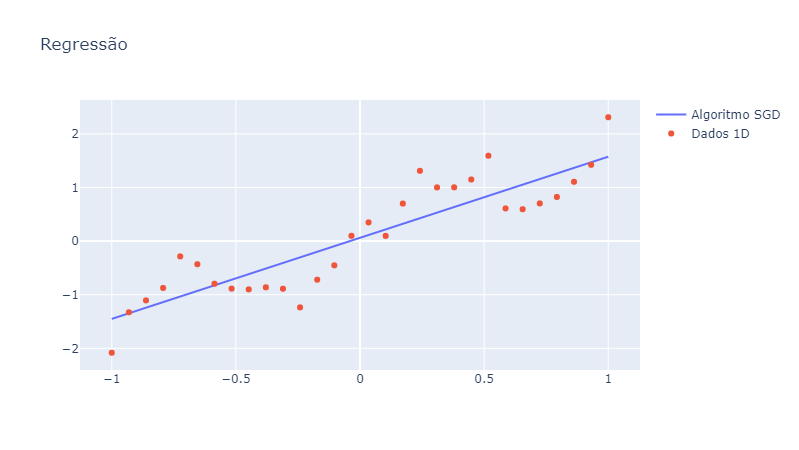

In [270]:
sgd.plot_line()

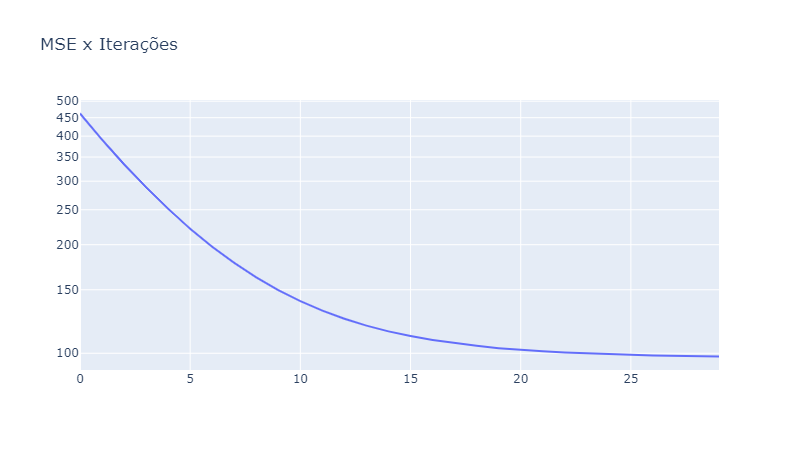

In [271]:
sgd.plot_mse()

# ANIMATE SGD

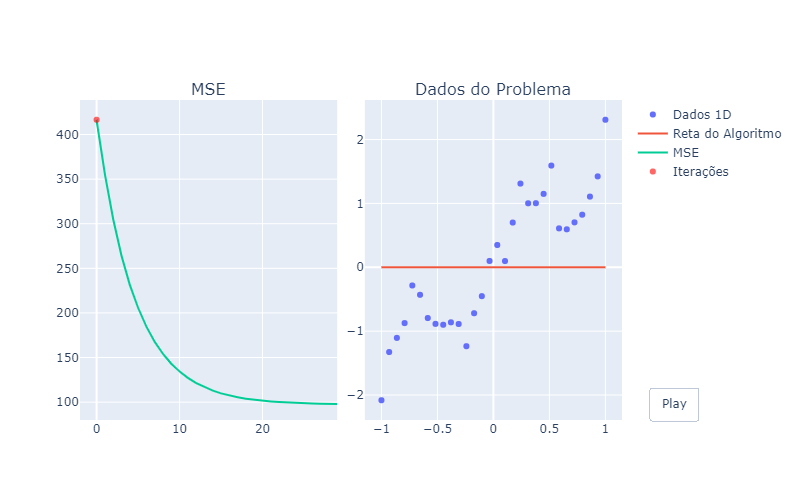

In [221]:
fig = make_subplots(
    rows=1, cols=2, subplot_titles=('MSE', 'Dados do Problema'),
    horizontal_spacing=0.051
)

fig.add_trace(go.Scatter(x = x,y = y,mode = 'markers', name = 'Dados 1D') ,row=1, col=2) 
fig.add_trace(go.Scatter(x = x,y = [0]*len(x), name = 'Reta do Algoritmo'),row=1, col=2) 

fig_data_mse = sgd.plot_mse().data[0]
#fig_data_mse.mode = 'markers'
#fig_data_mse.marker = dict(color="black", size=5)

fig.add_trace(fig_data_mse, row=1, col=1)

fig.add_trace(go.Scatter(x = [0], y = [sgd.valores_mse[0]], name = 'Iterações',mode = 'markers',opacity = 0.6,  marker = dict(color = 'red')), row=1, col=1)  

frames =[go.Frame(data=[go.Scatter(visible=True),
                        
                        go.Scatter(x = x, y = sgd.valores_w0[k] + sgd.valores_w1[k]*x),
                        
                        go.Scatter(visible=True),
                        
                        go.Scatter(x = [k] ,y = [sgd.valores_mse[k]], mode = 'markers',marker=dict(color="red", size=10))],
                  traces=[0,1,2,3]) for k in range(0,len(sgd.valores_mse),5)]

fig.frames=frames
button = dict(
             label='Play',
             method='animate',
             args=[None, dict(frame=dict(duration=1000, redraw=False),
                              fromcurrent=True,
                              mode='animate')])
fig.update_layout(updatemenus=[dict(type='buttons',
                              showactive=False,
                              y=0,
                              x=1.05,
                              xanchor='left',
                              yanchor='bottom',
                              buttons=[button] )
                                      ],
                 width=1000, height=500)
                              
fig 

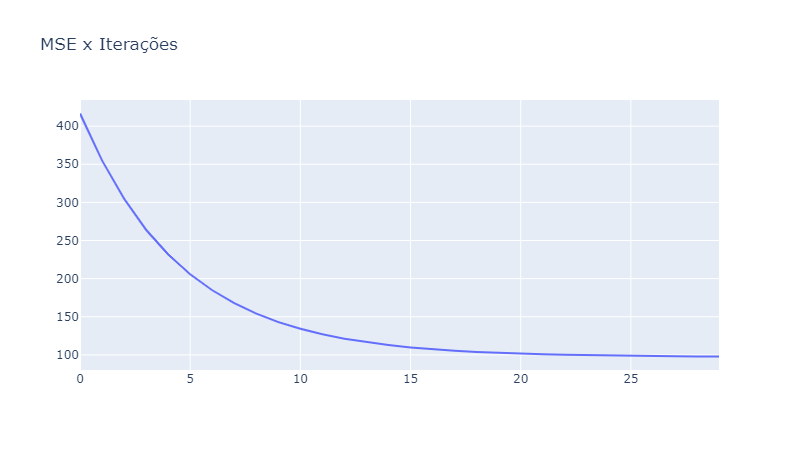

In [222]:
sgd.plot_mse()